<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE30338](https://jckantor.github.io/CBE30338);
content is available [on Github](https://github.com/jckantor/CBE30338.git).*


<!--NAVIGATION-->
< [3.4 Fitting First Order plus Time Delay to Step Response](https://jckantor.github.io/CBE30338/03.04-Fitting-First-Order-plus-Time-Delay-to-Step-Response.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.6 Second Order Models](https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/03.05-One-Compartment-Pharmacokinetics.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE30338/03.05-One-Compartment-Pharmacokinetics.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.5 One Compartment Pharmacokinetics

## 3.5.1 Summary

Pharmacokinetics is a branch of pharmacology that studies the fate of chemical species in living organisms. The diverse range of applications includes the administration of drugs and anesthesia in humans. This notebook introduces a one compartment model for pharmacokinetics, and shows how it can be used to determine strategies for the intravenous administration of an antibiotic.

The notebook demonstrates the simulation and analysis of systems modeled by a single first-order linear differential equation.

## 3.5.2 Antibiotics

Let's consider the administration of an antibiotic to a patient. Concentration $C$ refers to the concentration of the antibiotic in blood plasma with units [mg/liter]. 

**Minimum Inhibitory Concentration (MIC)** The minimum concentration of the antibiotic that prevents growth of a particular bacterium.

**Minimum Bactricidal Concentration (MBC)** The lowest concentration of the antibiotic that kills a particular bacterium.

Extended exposure to an antibiotic at levels below MBC leads to [antibiotic resistance](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378521/).

## 3.5.3 Model Description

A simple pharmacokinetic model has the same form as a model for the dilution of a chemical species in a constant volume stirred-tank mixer.  For a stirred-tank reactor with constant volume $V$, volumetric outlet flowrate $Q$, and inlet mass flow $u(t)$,

$$V \frac{dC}{dt} = u(t) - Q C(t)$$

where $C$ is concentration in units of mass per unit volume. In this pharacokinetics application, $V$ refers to blood plasma volume, and $Q$ to the clearance rate.

## 3.5.4 Problem Statement 1

The minimum inhibitory concentration (MIC) of a particular organism to a particular antibiotic is 5 mg/liter, the minimum bactricidal concentration (MBC) is 8 mg/liter. Assume the plasma volume $V$ is 4 liters with a clearance rate $Q$ of 0.5 liters/hour. 

An initial intravenous antibiotic dose of 64 mg results in an initial plasma concentration $C_{initial}$ of 64mg/4 liters = 16 mg/liter.  How long will the concentration stay above MBC?  Above MIC?

## 3.5.5 Solution Strategy 1: Simulation from a Known Initial Condition

For this first simulation we compute the response of the one compartment model due starting with an initial condition $C_{initial}$, and assuming input $u(t) = 0$.  

### 3.5.5.1 Step 1. Initialization

Generally the first steps in any Jupyter notebook are to 

1. Initialize the plotting system.
2. Import the `numpy` library for basic mathematical functions.
3. Import the `matplotlib.pyplot` library for plotting.

In addition, for this application we also import `odeint` function for solving differential equations from the `scipy.integrate` library.

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### 3.5.5.2 Step 2. Enter Parameter Values

In [17]:
V = 4          # liters
Q = 0.5        # liters/hour
MIC = 5        # mg/liter
MBC = 8        # mg/liter

Cinitial = 16  # mg/liter

### 3.5.5.3 Step 3. A Function the RHS of the Differential equation

$$\frac{dC}{dt} = \frac{1}{V}u(t) - \frac{Q}{V}C$$

where $u(t) = 0$.

In [18]:
def u(t):
    return 0

def deriv(C,t):
    return u(t)/V - (Q/V)*C

### 3.5.5.4 Step 4. Solution and Visualization

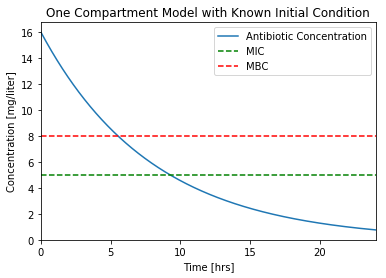

In [20]:
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

def plotConcentration(t,C):
    plt.plot(t,C)
    plt.xlim(0,max(t))
    plt.plot(plt.xlim(),[MIC,MIC],'g--',plt.xlim(),[MBC,MBC],'r--')
    plt.legend(['Antibiotic Concentration','MIC','MBC'])
    plt.xlabel('Time [hrs]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('One Compartment Model with Known Initial Condition');
    
plotConcentration(t,C)
plt.savefig('./figures/Pharmaockinetics1.png')

### 3.5.5.5 Step 5. Analysis of the Results

Let's compare our results to a typical experimental result. 

| | |
| :-: | :-: |
|![](./figures/Pharmaockinetics1.png)|![](figures/nihms-475924-f0001.jpg)|

We see that that the assumption of a fixed initial condition is questionable. Can we fix this?

[Levison, Matthew E., and Julie H. Levison. “Pharmacokinetics and Pharmacodynamics of Antibacterial Agents.” Infectious disease clinics of North America 23.4 (2009): 791–vii. PMC. Web. 8 May 2017.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3675903/)

## 3.5.6 Solution Strategy 2: Time-Dependent Input

For the next simulation we will assume the dosing takes place over a short period of time $\delta t$. To obtain a total dose $U_{dose}$ in a time period $\delta t$, the mass flow rate rate must be

$$u(t) = 
\begin{cases}
U/ \delta t \qquad \mbox{for } 0 \leq t \leq \delta t \\
0 \qquad \mbox{for } t \geq \delta t
\end{cases}
$$

Before doing a simulation, we will write a Python function for $u(t)$. 

In [5]:
# parameter values
dt = 1.5         # length hours
Udose = 64       # mg

# function defintion
def u(t):
    if t <= dt:
        return Udose/dt
    else:
        return 0

This code cell demonstrates the use of a list comprehension to apply a function to each value in a list.

Text(0.5,1,'Dosing function u(t) for of total dose 64 mg')

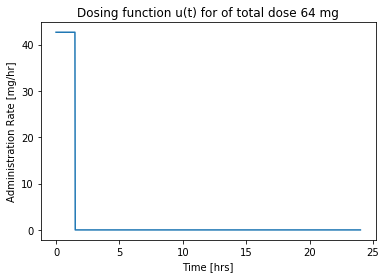

In [6]:
# visualization
t = np.linspace(0,24,1000)    # create a list of time steps
y = [u(tau) for tau in t]         # list comprehension
plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.title('Dosing function u(t) for of total dose {0} mg'.format(Udose))

Simulation

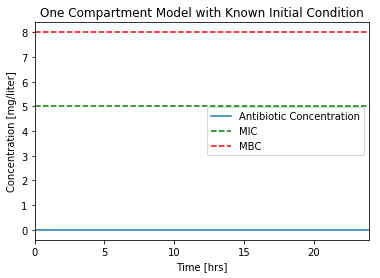

In [21]:
Cinitial = 0
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

plotConcentration(t,C)
plt.savefig('./figures/Pharmaockinetics2.png')

### 3.5.6.1 Analysis of the Results

Let's compare our results to a typical experimental result. 

| | |
| :-: | :-: |
|![](./figures/Pharmaockinetics2.png)|![](./figures/nihms-475924-f0001.jpg)|

While it isn't perfect, this is a closer facsimile of actual physiological response.

[Levison, Matthew E., and Julie H. Levison. “Pharmacokinetics and Pharmacodynamics of Antibacterial Agents.” Infectious disease clinics of North America 23.4 (2009): 791–vii. PMC. Web. 8 May 2017.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3675903/)

## 3.5.7 Problem Statement 2

The minimum inhibitory concentration (MIC) of a particular organism to a particular antibiotic is 5 mg/liter, the minimum bactricidal concentration (MBC) is 8 mg/liter. Assume the plasma volume $V$ is 4 liters with a clearance rate $Q$ of 0.5 liters/hour. 

Design an antibiotic therapy to keep the plasma concentration above the MIC level for a period of 96 hours. 

## 3.5.8 Solution Strategy 3: Periodic Dosing

Finally, we'll consider the case of repetitive dosing where a new dose is administered every $t_{dose}$ hours. The trick to this calculation is the Python `%` operator which returns the remainder following division. This is a very useful tool for creating complex repetitive functions.

In [8]:
# parameter values
td = 2           # length of administration for a single dose
tdose = 8        # time between doses
Udose = 42       # mg

# function defintion
def u(t):
    if t % tdose <= dt:
        return Udose/td
    else:
        return 0

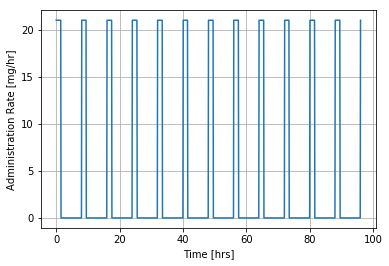

In [9]:
# visualization
t = np.linspace(0,96,1000)    # create a list of time steps
y = [u(t) for t in t]         # list comprehension

plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.grid()

The dosing function $u(t)$ is now applied to the simulation of drug concentration in the blood plasma. A fourth argument is added to `odeint(deriv, Cinitial, t, tcrit=t)` indicating that special care must be used for every time step. This is needed in order to get a high fidelity simulation that accounts for the rapidly varying values of $u(t)$.

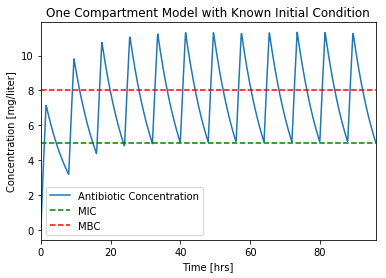

In [10]:
Cinitial = 0
t = np.linspace(0,96,1000)
C = odeint(deriv, Cinitial, t, tcrit=t)
plotConcentration(t,C)

# 3.5 Exercise 1

The purpose of the dosing regime is to maintain the plasma concentration above the MIC level for at least 96 hours. Assuming that each dose is 64 mg, modify the simulation and find a value of $t_{dose}$ that results satisfies the MIC objective for a 96 hour period.  Show a plot concentration versus time, and include Python code to compute the total amount of antibiotic administered for the whole treatment.

# 3.5 Exercise 2

Consider a continous antibiotic injection at a constant rate designed to maintain the plasma concentration at minimum bactricidal level. Your solution should proceed in three steps:

1. First, by hand, set up and solve the steady state equation to find the desired constant dosage rate. 
2. Modify the Python function for $u(t)$ to simulate the desired flowrate.
3. Verify your result by repeating the above simulation using your function for $u(t)$. 

<!--NAVIGATION-->
< [3.4 Fitting First Order plus Time Delay to Step Response](https://jckantor.github.io/CBE30338/03.04-Fitting-First-Order-plus-Time-Delay-to-Step-Response.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.6 Second Order Models](https://jckantor.github.io/CBE30338/03.06-Second-Order-Models.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/03.05-One-Compartment-Pharmacokinetics.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE30338/03.05-One-Compartment-Pharmacokinetics.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>